<a href="https://colab.research.google.com/github/Ashikacp/Datascience/blob/main/learning/svm_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5.0, 5.0, 100)  #array of 100 equally spaced values between -5.0 and 5.0
y=np.sqrt(10**2 - x**2)  #Value of circle sqrt(r^2-x^2) where radius=10
y=np.hstack([y,-y])  #stacks the positive y values and their corresponding negative values into a single array
x=np.hstack([x,-x])
#np.hstack([y,-y]) function horizontally stacks the arrays, so  end up with an array that contains both the upper and lower semicircles' y values.

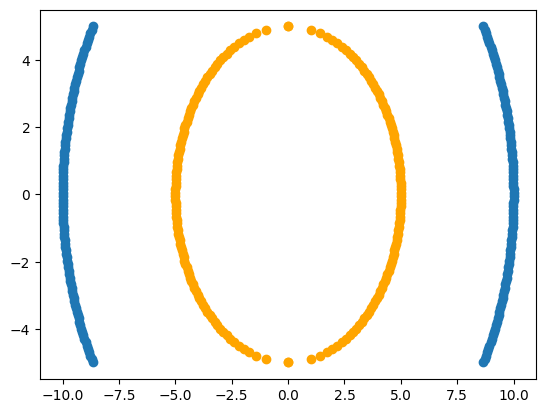

In [103]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])


plt.scatter(y,x)
plt.scatter(y1,x1,color='orange')

here data is not-linearly separable,it will be difficult to find a best fit line.so we need to use svm kernels .

In [104]:
print(y.shape, x.shape)
print(y1.shape, x1.shape)

(200,) (200,)
(200,) (200,)


In [105]:
#creates a Pandas DataFrame from the y and x arrays.
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])#this creates a 2D array where y is the first row, and x is the second row.
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [106]:
#independent and dependent variable
X=df.iloc[:,:-1]
y=df.Y


In [107]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [110]:
#svm algorithm
from sklearn.svm import SVC
classifier=SVC(kernel='linear') #Assumes data is linearly separable. No transformation of the feature space; works in the original space

classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [111]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.45

here we are getting poor accurancy since we are using linear. here we are not transforming the data ,instead trying to find best fit line.so errors wil be there

Use **Polynomial kernel**


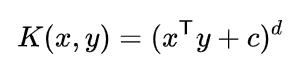

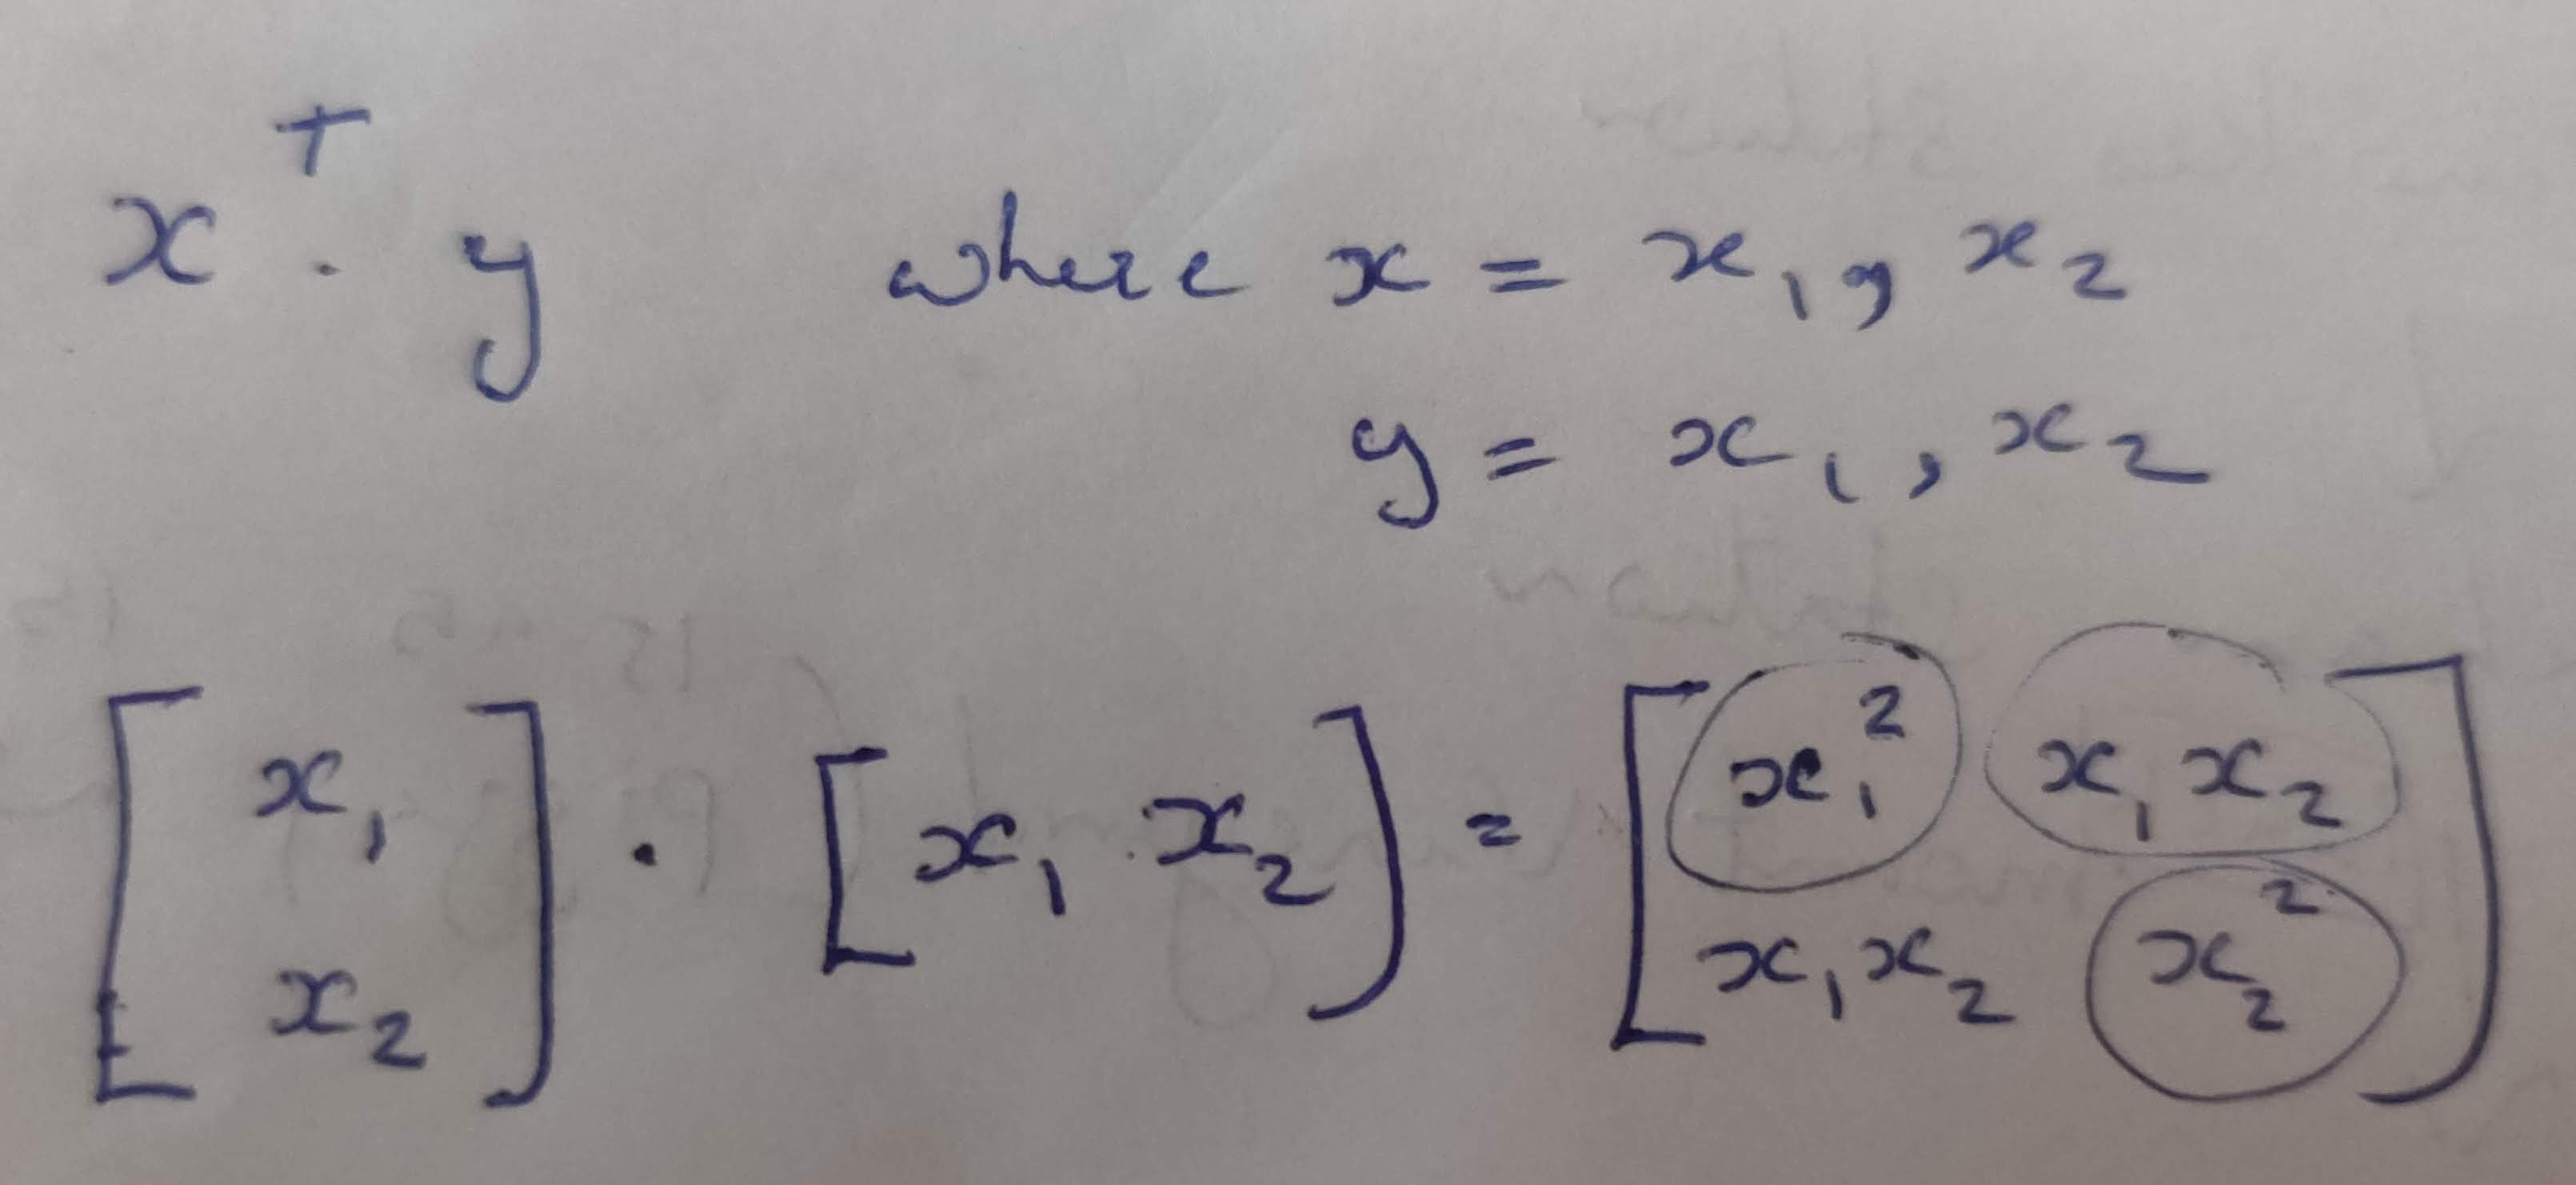

In [112]:
#we need to find components for the polynomial kernel ie, x1_square,x2_square,x1*x2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [113]:
#initially we had 2 features, x1 and x2. now we have 5 features x1,x2 , x1_square,x2_square,x1*x2
# independent and dependent variable
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

,X1,X2,X1_Square,X2_Square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [115]:
#initally we are analysing the graph with points x1 ,x2 and x1*x2
import plotly.express as px
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

here even after taking 3 components ,we are unable to find a best fit line that seperate these data point .lets consider x1_square ,x2_square and x1*x2 components and see whether we can able to separate the datapoints to find a fitted line

In [116]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

the o/p is b'coz of the polynomial kernel.we can draw a plane/line to split the dataset into two categories

In [117]:
#now we have transferred the data into high dimensional space and it is now linearly separable.so we can train it with kernel value as linear
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

here the accuracy has increased to 1 from 0.45.

#Note: we **dont want to use** all these steps like creating components (x1_square ,x2_square,x1*x2)  in real scenario. in sklearn we have different kind of kernel and **`we can directly use kernel="poly" or kernel="rbf"`**

classifier=SVC(kernel='rbf')